In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from numpy import argmax
import matplotlib.ticker as mtick
import seaborn as sns

In [132]:
raw_bike_df = pd.read_csv("../data/hour.csv")

In [133]:
raw_bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Part A. Linear Regression From Scratch

## 1 Dataset

In [134]:
analytics_bike_df = (
    raw_bike_df.
        assign(
            dteday = pd.to_datetime(raw_bike_df["dteday"], format="%Y-%m-%d")
            )
        .sort_values(by="dteday", ascending=True)   
    )

In [135]:
# First Approach
analytics_bike_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [136]:
# no Nulls or None
analytics_bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [137]:
# data consistency
sum(analytics_bike_df["registered"] + analytics_bike_df["casual"] - analytics_bike_df["cnt"])

0

### Line Charts

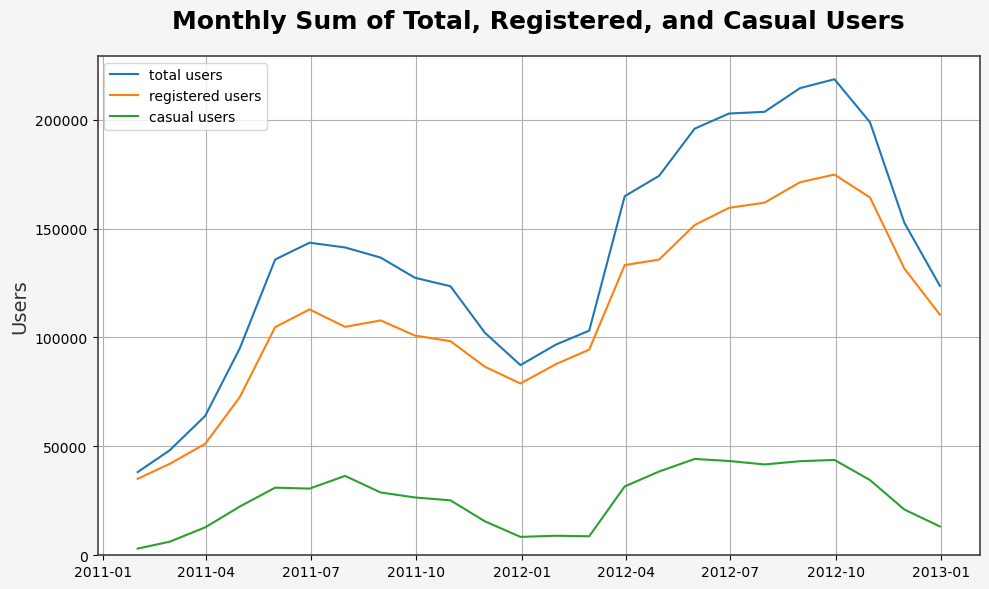

In [138]:
fig, axis = plt.subplots(1, 1)
monthly_sum = (
    analytics_bike_df
    .groupby(pd.Grouper(key="dteday", freq="ME"))[["cnt", "registered", "casual"]]
    .sum()
)

axis.plot(monthly_sum["cnt"], label="total users")
axis.plot(monthly_sum["registered"], label = "registered users")
axis.plot(monthly_sum["casual"], label="casual users")
axis.set_title("Monthly Sum of Total, Registered, and Casual Users")
axis.legend()
axis.set_ylabel("Users")
axis.set_ylim(0,)
plt.tight_layout()
plt.show()

### Histogram exploration

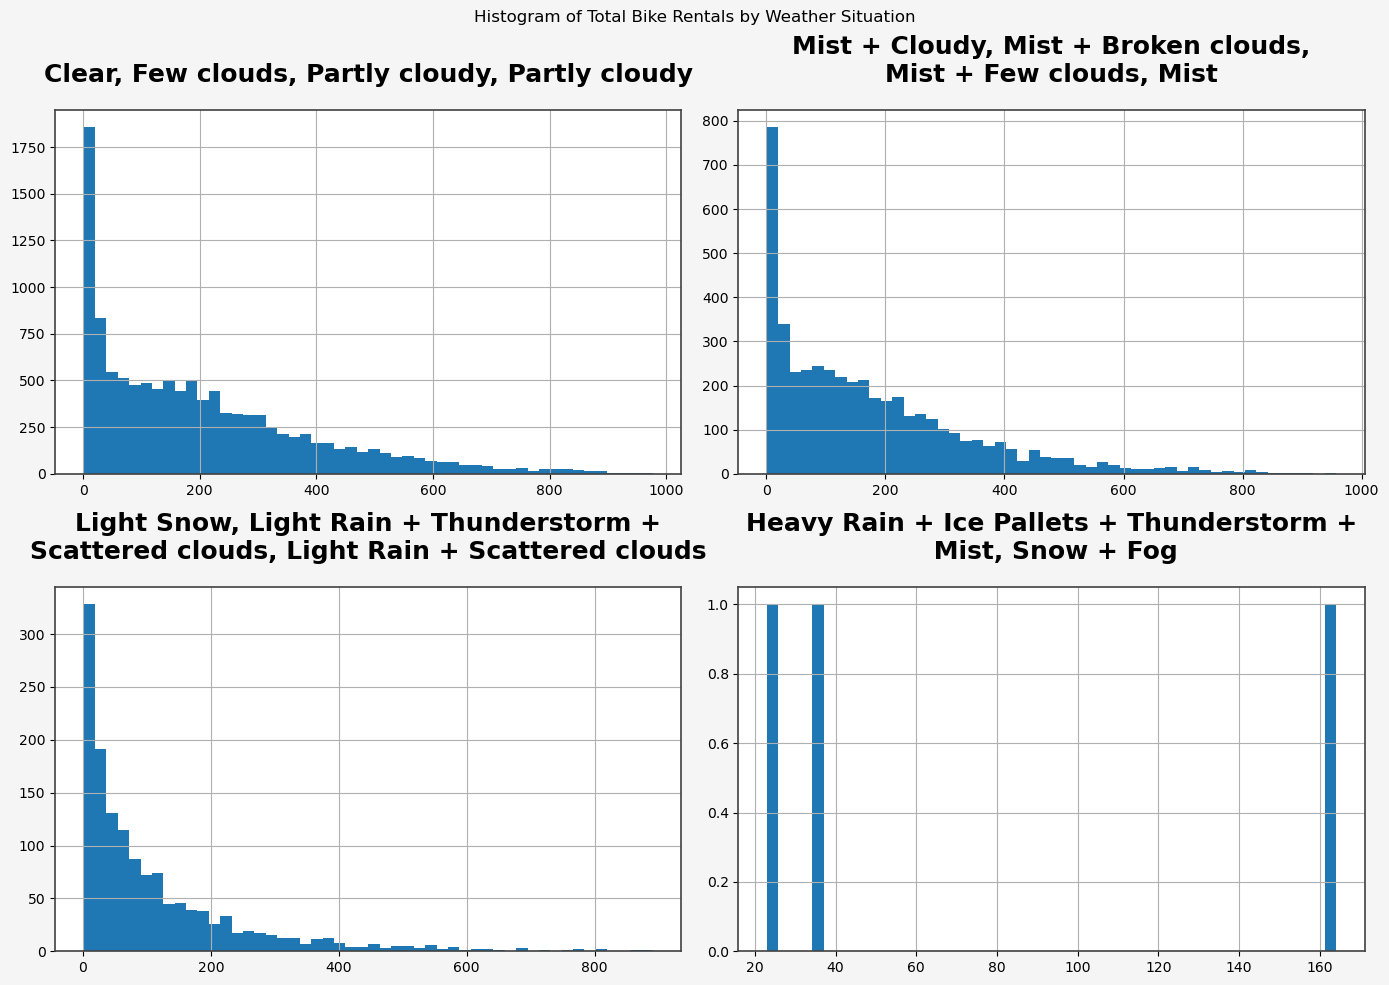

In [139]:
fig, axis = plt.subplots(2, 2, figsize=(14, 10))

axis[0, 0].hist(analytics_bike_df.loc[lambda x: x["weathersit"]==1, "cnt"], bins=50)
axis[0, 0].set_title("Clear, Few clouds, Partly cloudy, Partly cloudy")

axis[0, 1].hist(analytics_bike_df.loc[lambda x: x["weathersit"]==2, "cnt"], bins=50)
axis[0, 1].set_title("Mist + Cloudy, Mist + Broken clouds,\nMist + Few clouds, Mist")

axis[1, 0].hist(analytics_bike_df.loc[lambda x: x["weathersit"]==3, "cnt"], bins=50)
axis[1, 0].set_title("Light Snow, Light Rain + Thunderstorm +\nScattered clouds, Light Rain + Scattered clouds")

axis[1, 1].hist(analytics_bike_df.loc[lambda x: x["weathersit"]==4, "cnt"], bins=50)
axis[1, 1].set_title("Heavy Rain + Ice Pallets + Thunderstorm +\n Mist, Snow + Fog")
fig.suptitle("Histogram of Total Bike Rentals by Weather Situation")
plt.tight_layout()
plt.show()

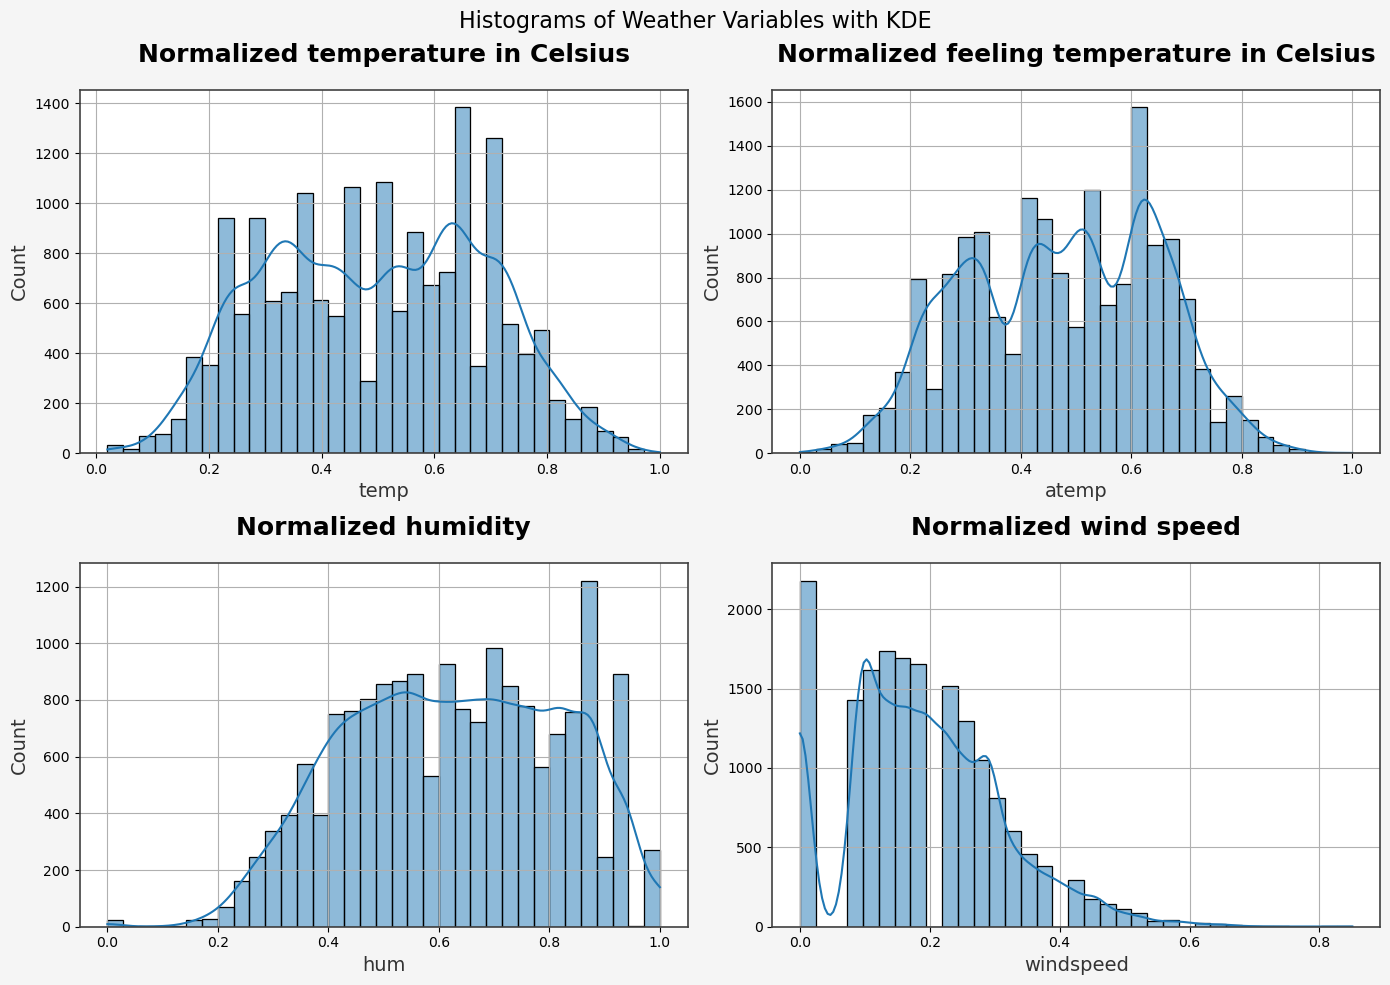

In [140]:
fig, axis = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(analytics_bike_df["temp"], bins=35, kde=True, ax=axis[0, 0])
axis[0, 0].set_title("Normalized temperature in Celsius")

sns.histplot(analytics_bike_df["atemp"], bins=35, kde=True, ax=axis[0, 1])
axis[0, 1].set_title("Normalized feeling temperature in Celsius")

sns.histplot(analytics_bike_df["hum"], bins=35, kde=True, ax=axis[1, 0])
axis[1, 0].set_title("Normalized humidity")

sns.histplot(analytics_bike_df["windspeed"], bins=35, kde=True, ax=axis[1, 1])
axis[1, 1].set_title("Normalized wind speed")

fig.suptitle("Histograms of Weather Variables with KDE", fontsize=16)
plt.tight_layout()
plt.show()

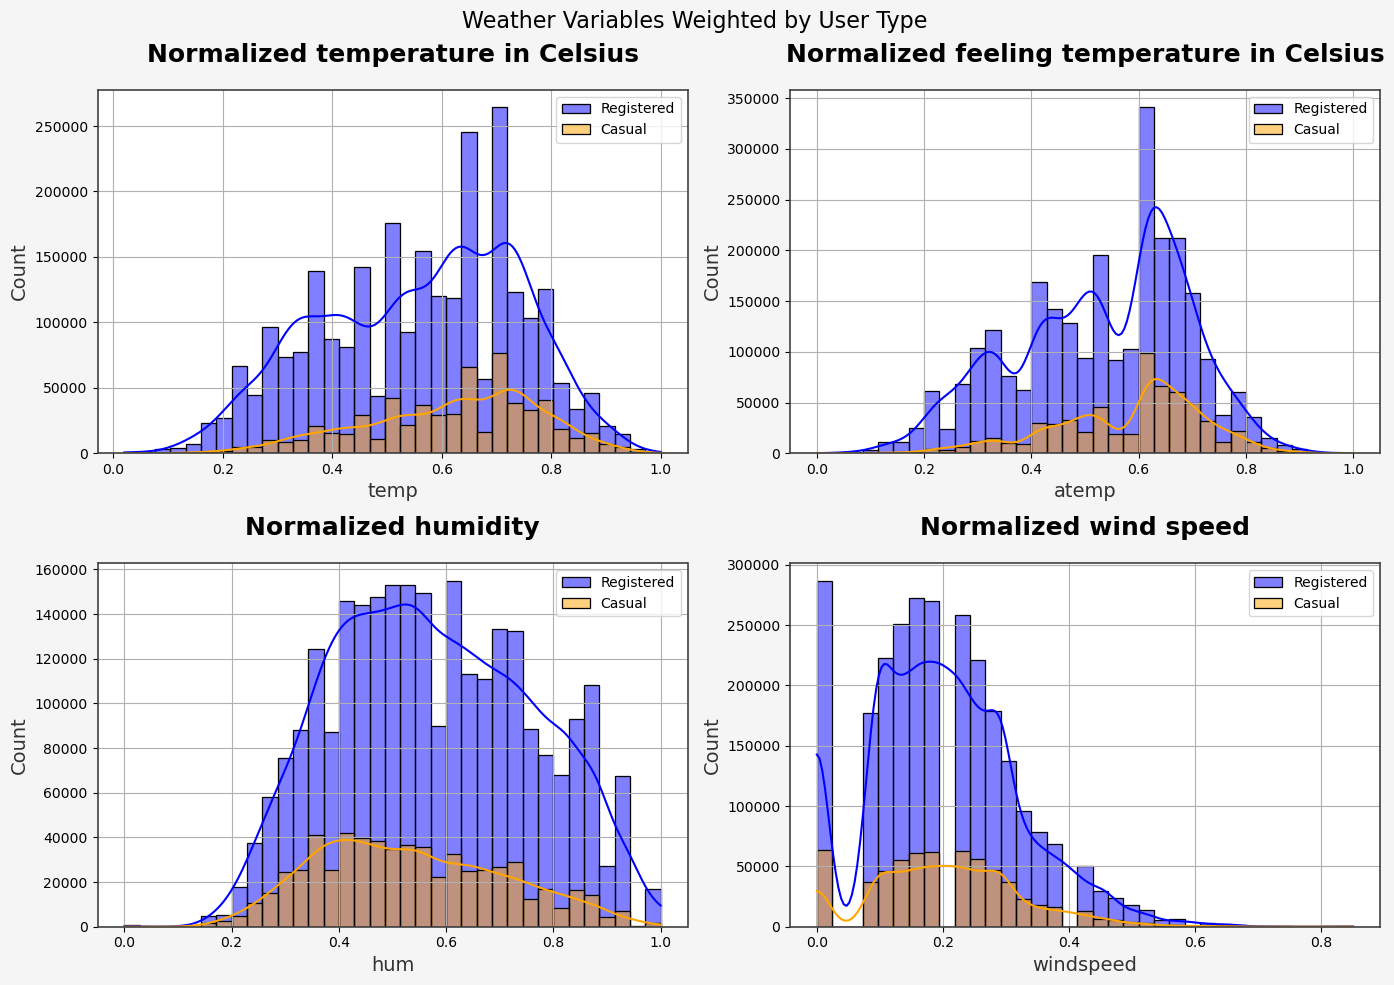

In [141]:
fig, axis = plt.subplots(2, 2, figsize=(14, 10))

variables = ["temp", "atemp", "hum", "windspeed"]
titles = [
    "Normalized temperature in Celsius",
    "Normalized feeling temperature in Celsius",
    "Normalized humidity",
    "Normalized wind speed"
]

for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    
    sns.histplot(
        data=analytics_bike_df,
        x=var,
        bins=35,
        kde=True,
        weights=analytics_bike_df["registered"],
        color="blue",
        label="Registered",
        alpha=0.5,
        ax=axis[row, col]
    )
    
    sns.histplot(
        data=analytics_bike_df,
        x=var,
        bins=35,
        kde=True,
        weights=analytics_bike_df["casual"],
        color="orange",
        label="Casual",
        alpha=0.5,
        ax=axis[row, col]
    )
    
    axis[row, col].set_title(titles[i])
    axis[row, col].legend()

fig.suptitle("Weather Variables Weighted by User Type", fontsize=16)
plt.tight_layout()
plt.show()

### Boxplots

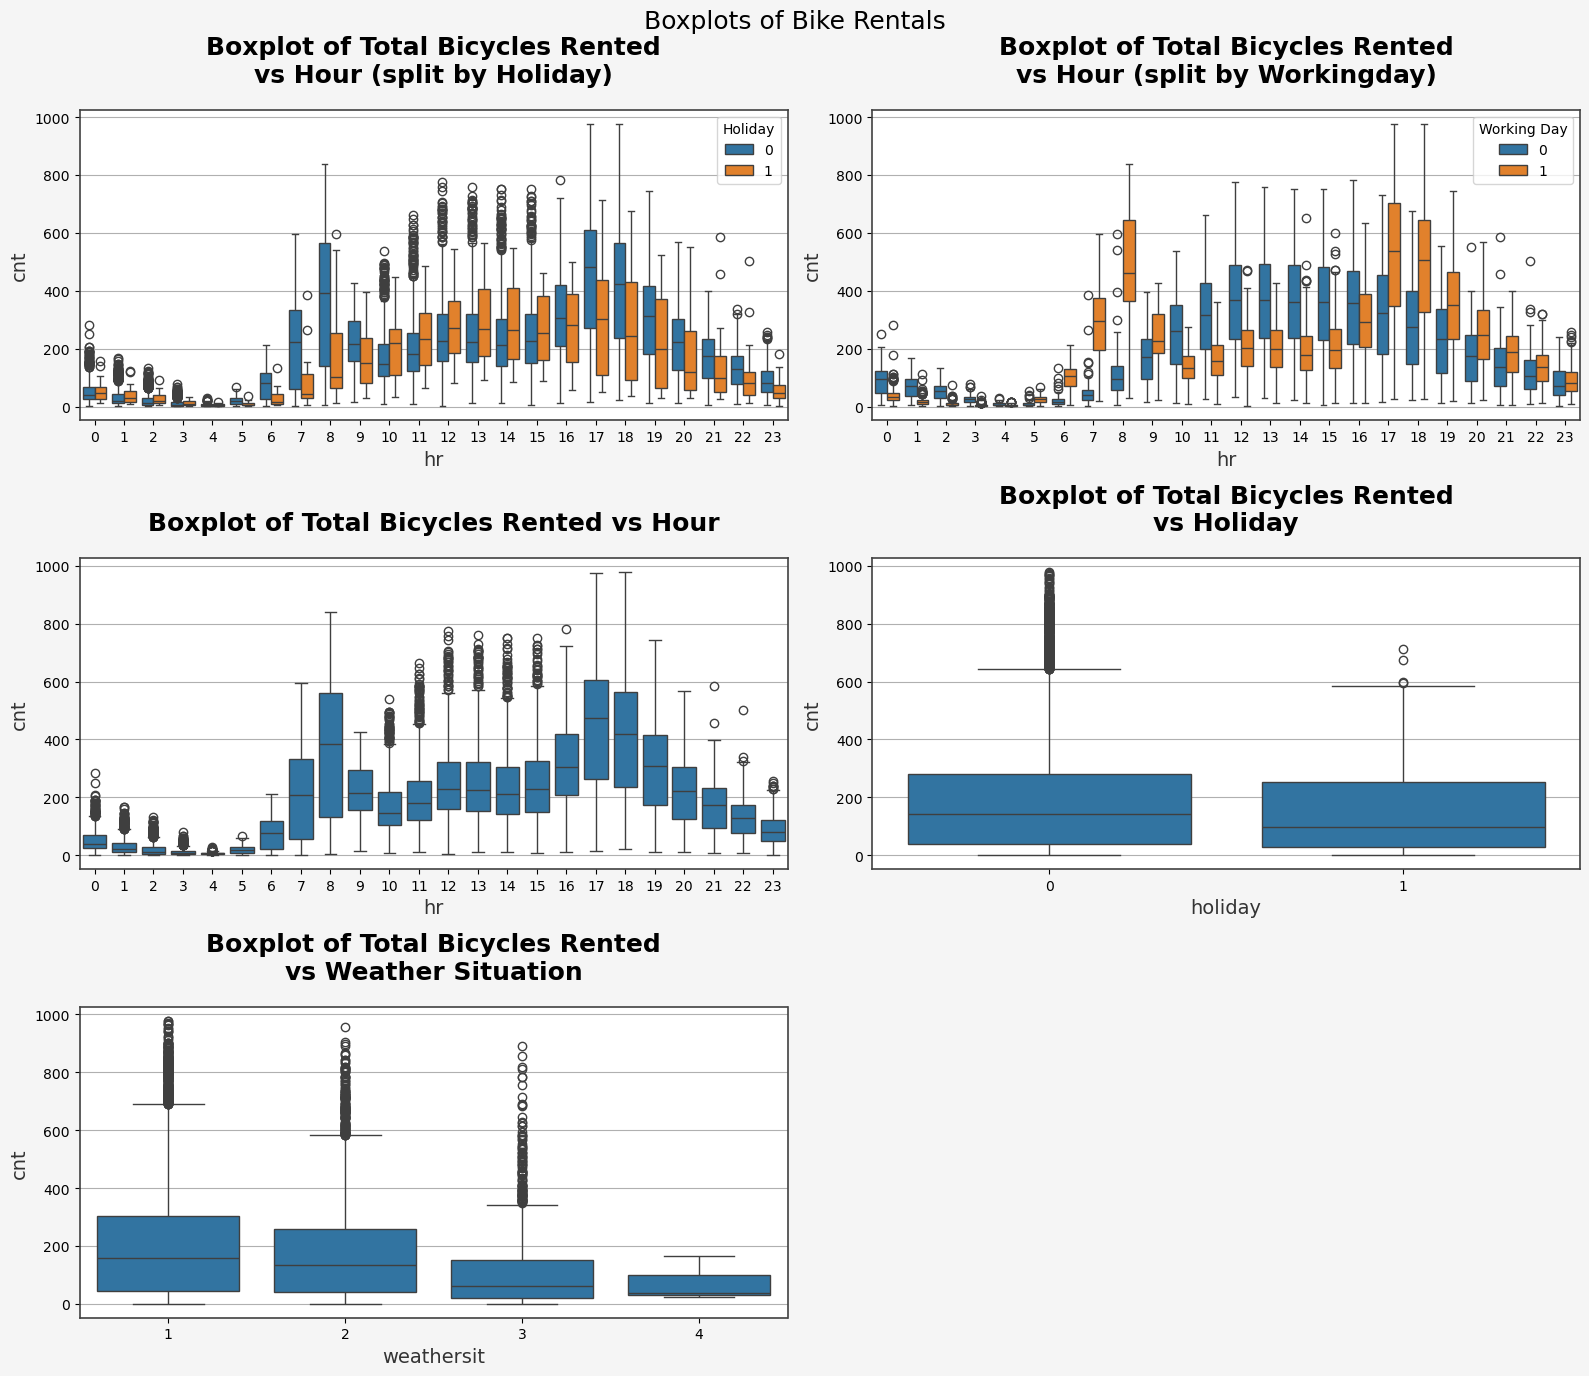

In [142]:
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

sns.boxplot(data=analytics_bike_df, x="hr", y="cnt", hue="holiday", ax=axes[0])
axes[0].set_title("Boxplot of Total Bicycles Rented\nvs Hour (split by Holiday)")
axes[0].legend(title="Holiday")

sns.boxplot(data=analytics_bike_df, x="hr", y="cnt", hue="workingday", ax=axes[1])
axes[1].set_title("Boxplot of Total Bicycles Rented\nvs Hour (split by Workingday)")
axes[1].legend(title="Working Day")

sns.boxplot(data=analytics_bike_df, x="hr", y="cnt", ax=axes[2])
axes[2].set_title("Boxplot of Total Bicycles Rented vs Hour")

sns.boxplot(data=analytics_bike_df, x="holiday", y="cnt", ax=axes[3])
axes[3].set_title("Boxplot of Total Bicycles Rented\nvs Holiday")

sns.boxplot(data=analytics_bike_df, x="weathersit", y="cnt", ax=axes[4])
axes[4].set_title("Boxplot of Total Bicycles Rented\nvs Weather Situation")


fig.delaxes(axes[5])

fig.suptitle("Boxplots of Bike Rentals", fontsize=18)
plt.tight_layout()
plt.show()

### Scatter plots

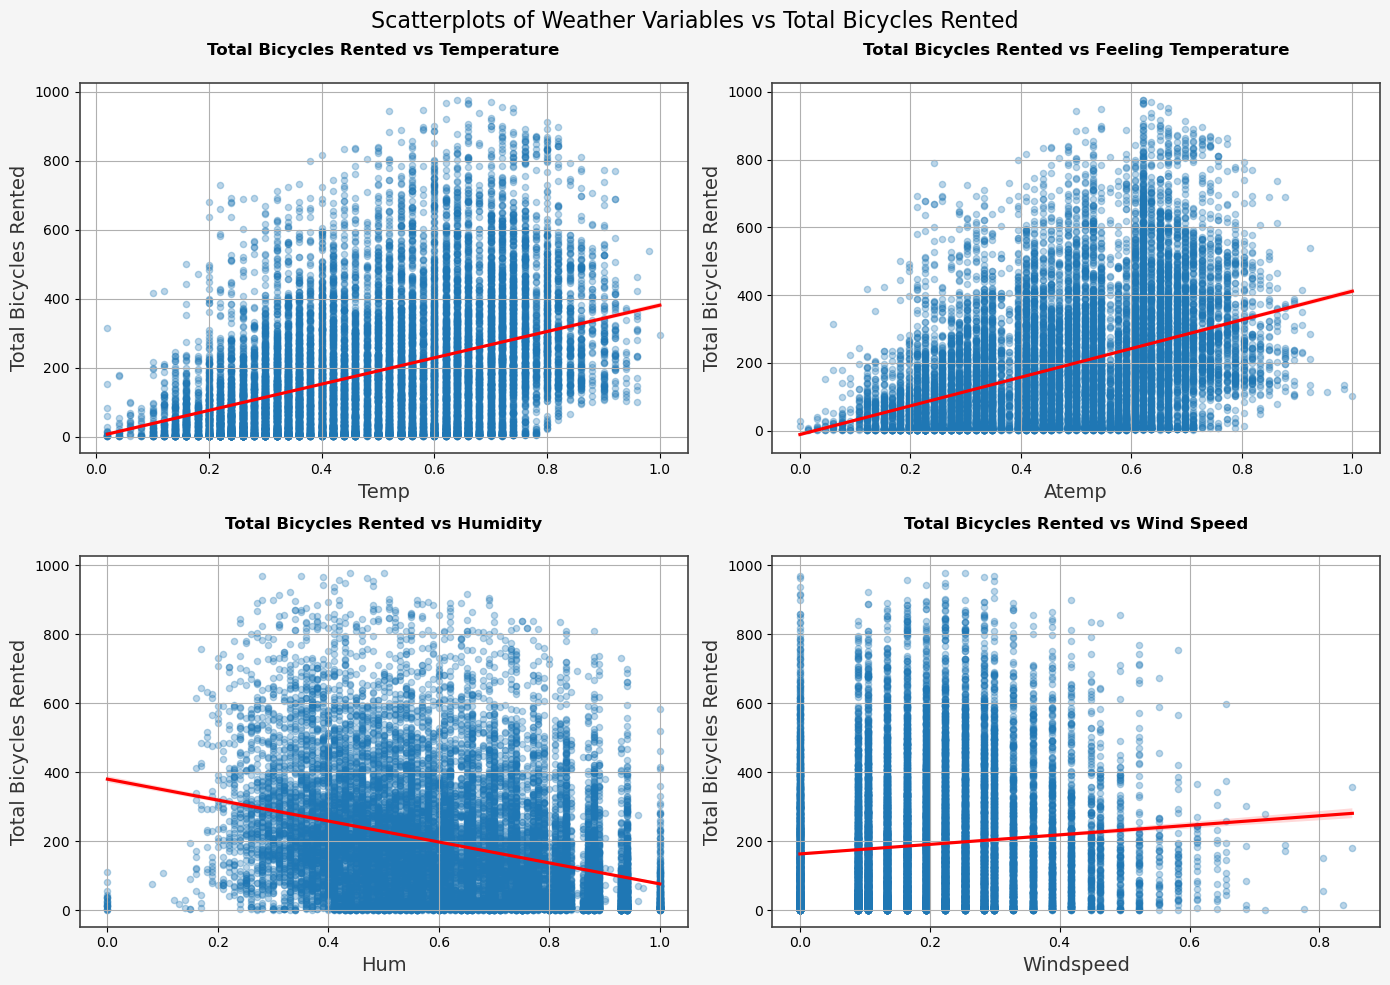

In [143]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

variables = ["temp", "atemp", "hum", "windspeed"]
titles = [
    "Total Bicycles Rented vs Temperature",
    "Total Bicycles Rented vs Feeling Temperature",
    "Total Bicycles Rented vs Humidity",
    "Total Bicycles Rented vs Wind Speed"
]

for i, var in enumerate(variables):
    sns.regplot(
        data=analytics_bike_df,
        x=var,
        y="cnt",
        scatter_kws={"alpha": 0.3, "s": 20},
        line_kws={"color": "red"},
        ax=axes[i]
    )
    axes[i].set_title(titles[i], fontsize=12)
    axes[i].set_ylabel("Total Bicycles Rented")
    axes[i].set_xlabel(var.capitalize())

fig.suptitle("Scatterplots of Weather Variables vs Total Bicycles Rented", fontsize=16)
plt.tight_layout()
plt.show()


### Stacked bar charts

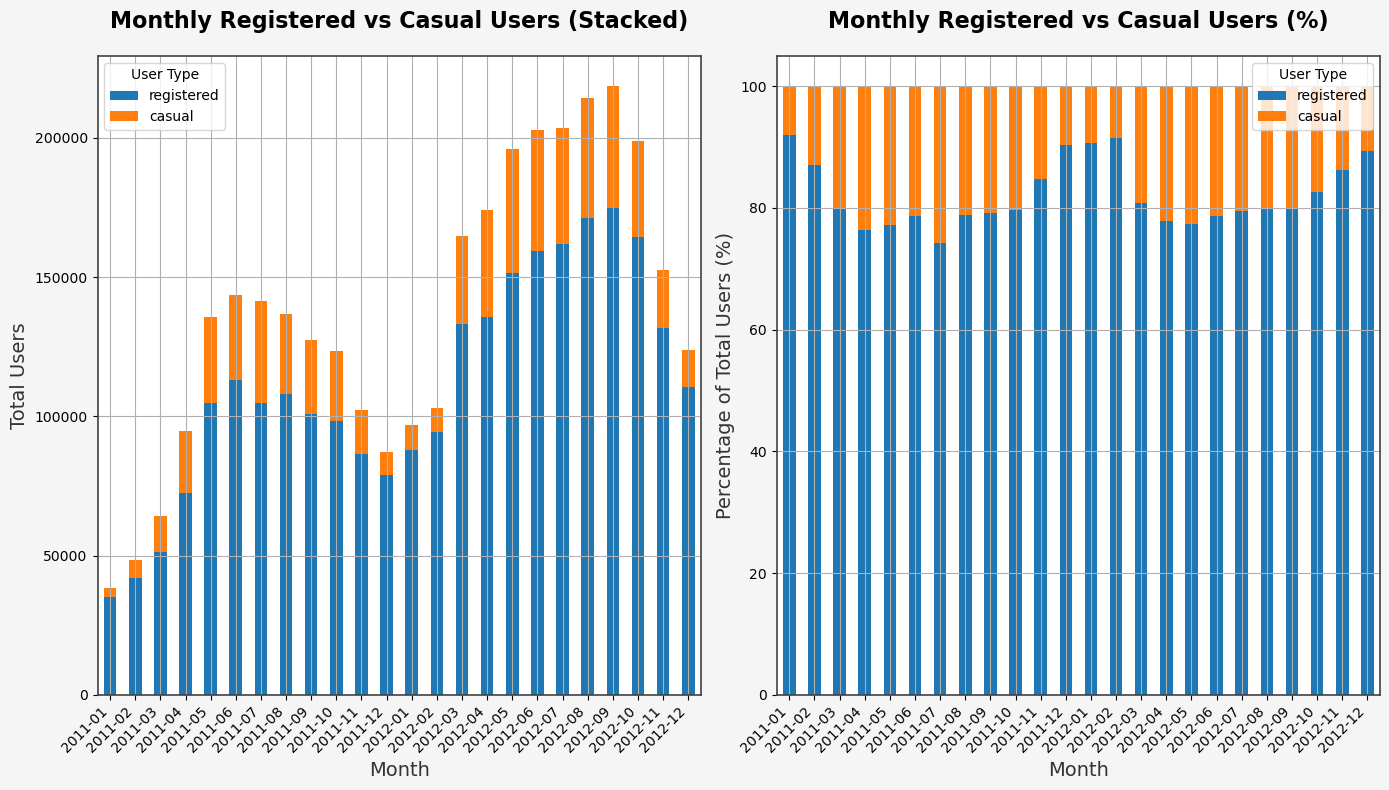

In [144]:
yearly_data = analytics_bike_df.groupby(pd.Grouper(key="dteday", freq="ME"))[["registered", "casual"]].sum()
yearly_data_percent = yearly_data.div(yearly_data.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(1,2, figsize=(14, 8))

axes = axes.flatten()

yearly_data.plot(
    kind="bar",
    stacked=True,
    ax=ax[0],
    color=["#1f77b4", "#ff7f0e"]
)

ax[0].set_title("Monthly Registered vs Casual Users (Stacked)", fontsize=16)
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Total Users")
ax[0].set_xticklabels(yearly_data.index.strftime("%Y-%m"), rotation=45, ha="right")
ax[0].legend(title="User Type")


yearly_data_percent.plot(
    kind="bar",
    stacked=True,
    ax=ax[1],
    color=["#1f77b4", "#ff7f0e"]
)

ax[1].set_title("Monthly Registered vs Casual Users (%)", fontsize=16)
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Percentage of Total Users (%)")
ax[1].set_xticklabels(yearly_data.index.strftime("%Y-%m"), rotation=45, ha="right")
ax[1].legend(title="User Type")

plt.tight_layout()
plt.show()

### Correlations and heatmap

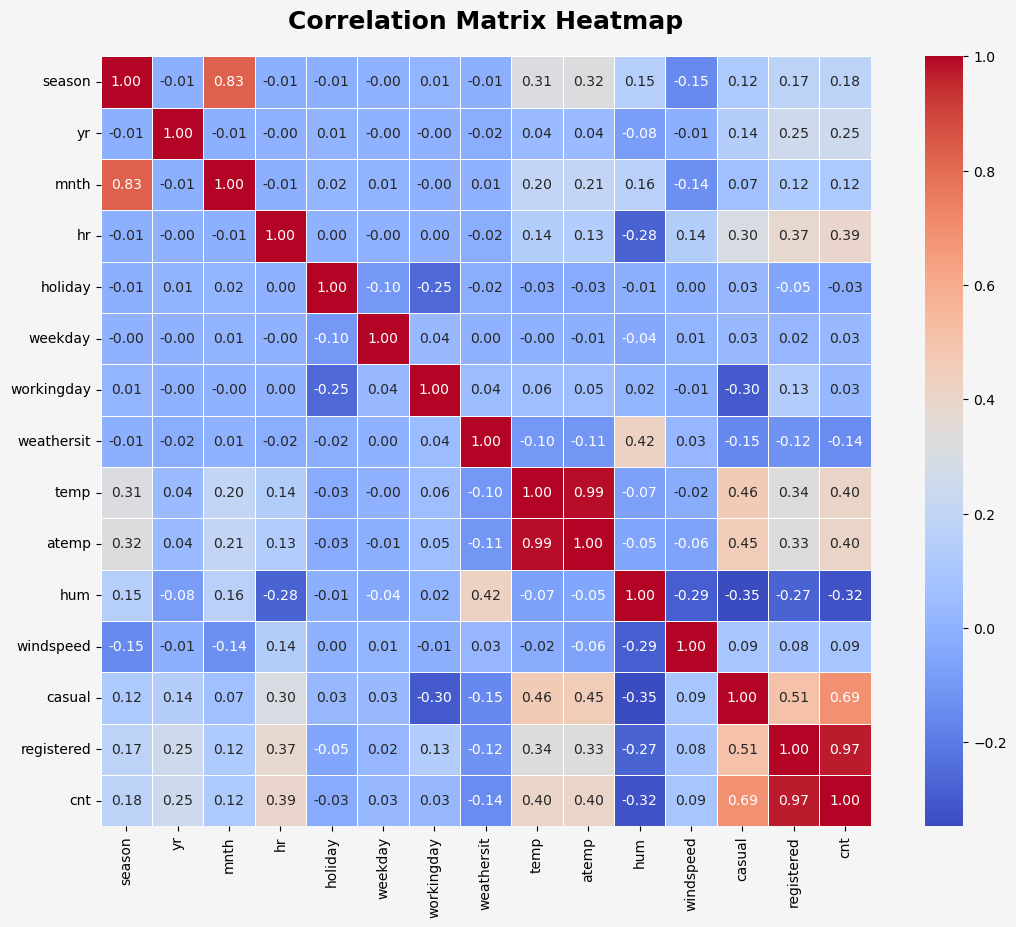

In [145]:
cols = [
    "season", "yr", "mnth", "hr", "holiday", "weekday", "workingday",
    "weathersit", "temp", "atemp", "hum", "windspeed",
    "casual", "registered", "cnt"
]

corr = analytics_bike_df[cols].corr()

fig , ax = plt.subplots(figsize=(14, 10))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5,
    ax=ax
)

ax.set_title("Correlation Matrix Heatmap", fontsize=18)
plt.grid()
plt.show()

### Conclusions based on the charts

What can be observed from the line chart is that monthly rentals increased rapidly but experienced a decline at the beginning of 2012. The histograms show that there is a higher concentration of users under better weather conditions and almost none under the worst conditions; however, even with rain, the total rentals remain considerable.

Regarding the distributions, weather-related variables such as temperature and perceived temperature resemble a normal distribution. For humidity, the distribution shows a heavy tail with negative skewness, whereas wind speed exhibits a heavy tail with positive skewness. When analyzing the distributions of these weather variables for registered and casual users, we observe that they follow the same distribution pattern but at different data scales.

Regarding the box plots, it can be seen that on holidays there is greater variance and more bike rentals compared to working days, which show lower variance and fewer rentals. Regarding hourly patterns, there are peaks during commuting hours, around 8 a.m. and between 4–5 p.m.

Regarding weather situations, as observed earlier, rentals decrease significantly under worse weather conditions. When examining the relationships between variables using scatter plots, there is a positive relationship between bike rentals and higher temperatures, as well as with perceived temperature. This relationship is negative for humidity, probably associated with heavy rain or worse weather conditions. As for wind speed, there appears to be a slight positive relationship.

Finally, when analyzing the relationship between casual and registered users, we can see that they have not remained constant. Casual rentals tend to drop proportionally more than registered rentals when bike rentals in general decline.

### Variables to include in the model

Based on the correlation plot, the correlation between "cnt" and "registered" is nearly 1, so to avoid multicollinearity, we will exclude the "registered" variable. Similarly, the correlation between "temp" and "atemp" is very high; we will keep "temp" as it is a more direct and practical measurement. Despite the high correlation between "month" and "season", we have decided to retain both variables for the analysis. All other remaining variables have correlation coefficients below 0.80 or above -0.80. Finally, we will remove variables that do not provide useful information for the model, such as "instant", which is just an index, and "dteday", as its information is already captured in other time-based variables. Therefore, the variables to be excluded are "registered", "atemp", "instant", and "dteday".

### Create a hold-out test set

We will not standardize the categorical or binary variables, such as season, yr, mnth, holiday, weekday, workingday, and weathersit. The target variable, cnt, will also be excluded from this process. Standardization will only be applied to the continuous numerical features: temp, hum, windspeed, and casual.

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Additionally, we can apply a sine and cosine transformation to the hour and month variables
# to solve the problem where hour 0 and 23 are close, not very far apart. The same goes for month 1 and 12.
analytics_bike_df['mnth_sin'] = np.sin(2 * np.pi * analytics_bike_df['mnth'] / 12.0)
analytics_bike_df['mnth_cos'] = np.cos(2 * np.pi * analytics_bike_df['mnth'] / 12.0)
analytics_bike_df['hr_sin'] = np.sin(2 * np.pi * analytics_bike_df['hr'] / 24.0)
analytics_bike_df['hr_cos'] = np.cos(2 * np.pi * analytics_bike_df['hr'] / 24.0)
analytics_bike_df.drop(['mnth', 'hr'], axis=1, inplace=True)


feature_cols = [
    'season', 'yr', 'mnth_sin', 'mnth_cos', 'hr_sin', 'hr_cos', 'holiday', 'weekday',
    'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual'
]

columns_to_standardize = ['temp', 'hum', 'windspeed', 'casual']

target_col = 'cnt'
X = analytics_bike_df[feature_cols]
y = analytics_bike_df[target_col]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=40
)

### Standardize features to zero mean and unit variance

In [147]:
scaler = StandardScaler()

X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])
X_test[columns_to_standardize] = scaler.transform(X_test[columns_to_standardize])

### Predict Y from the remaining features using LinearRegression from sklearn.linear_model.

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"The model's Mean Squared Error (MSE) is: {mse:.2f}")

The model's Mean Squared Error (MSE) is: 11739.09


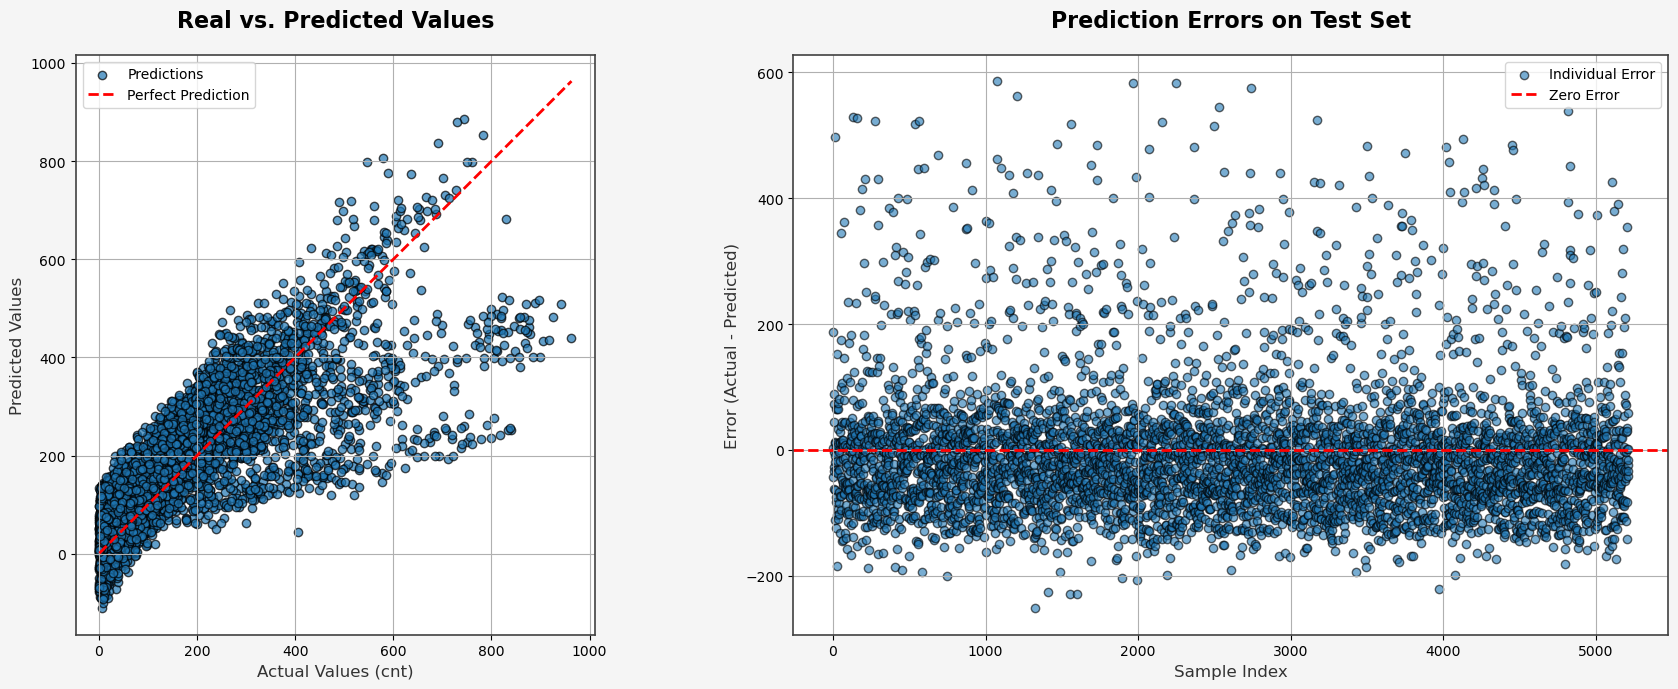

In [149]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].scatter(y_test, y_pred, alpha=0.7, edgecolor='k', label='Predictions')
linea_perfecta = [y_test.min(), y_test.max()]
ax[0].plot(linea_perfecta, linea_perfecta, 'r--', lw=2, label='Perfect Prediction')

ax[0].set_title('Real vs. Predicted Values', fontsize=16)
ax[0].set_xlabel('Actual Values (cnt)', fontsize=12)
ax[0].set_ylabel('Predicted Values', fontsize=12)
ax[0].legend()
ax[0].grid(True)
ax[0].set_aspect('equal', adjustable='box')

errores = y_test - y_pred

ax[1].scatter(range(len(errores)), errores, alpha=0.6, edgecolor='k', label='Individual Error')
ax[1].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Error')

ax[1].set_title('Prediction Errors on Test Set', fontsize=16)
ax[1].set_xlabel('Sample Index', fontsize=12)
ax[1].set_ylabel('Error (Actual - Predicted)', fontsize=12)
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

## 2. Closed-form OLS

### Derive and implement b_predicted using only numpy

In [163]:
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

X_train_beta = np.c_[np.ones(X_train_np.shape[0]), X_train_np]
X_test_beta = np.c_[np.ones(X_test_np.shape[0]), X_test_np]

beta_hat = np.linalg.inv(X_train_beta.T @ X_train_beta) @ X_train_beta.T @ y_train_np

### Report coefficients and intercept

In [164]:
intercept = beta_hat[0]
coefficients = beta_hat[1:]
print("## OLS Model Results for Bike Rentals ##")
print(f"Intercept: {intercept:.4f}\n")
print("Coefficients:")
for feature, coef in zip(feature_cols, coefficients):
    print(f"  - {feature}: {coef:.4f}")

## OLS Model Results for Bike Rentals ##
Intercept: 89.8123

Coefficients:
  - season: 17.7076
  - yr: 65.4418
  - mnth_sin: -5.3755
  - mnth_cos: -15.5522
  - hr_sin: -55.3104
  - hr_cos: -53.0190
  - holiday: 2.8088
  - weekday: -0.0175
  - workingday: 74.4544
  - weathersit: -19.6780
  - temp: -2.2075
  - hum: 2.8969
  - windspeed: 1.0510
  - casual: 96.4715


### Plot predicted vs. true bike rentals values on a held-out test set

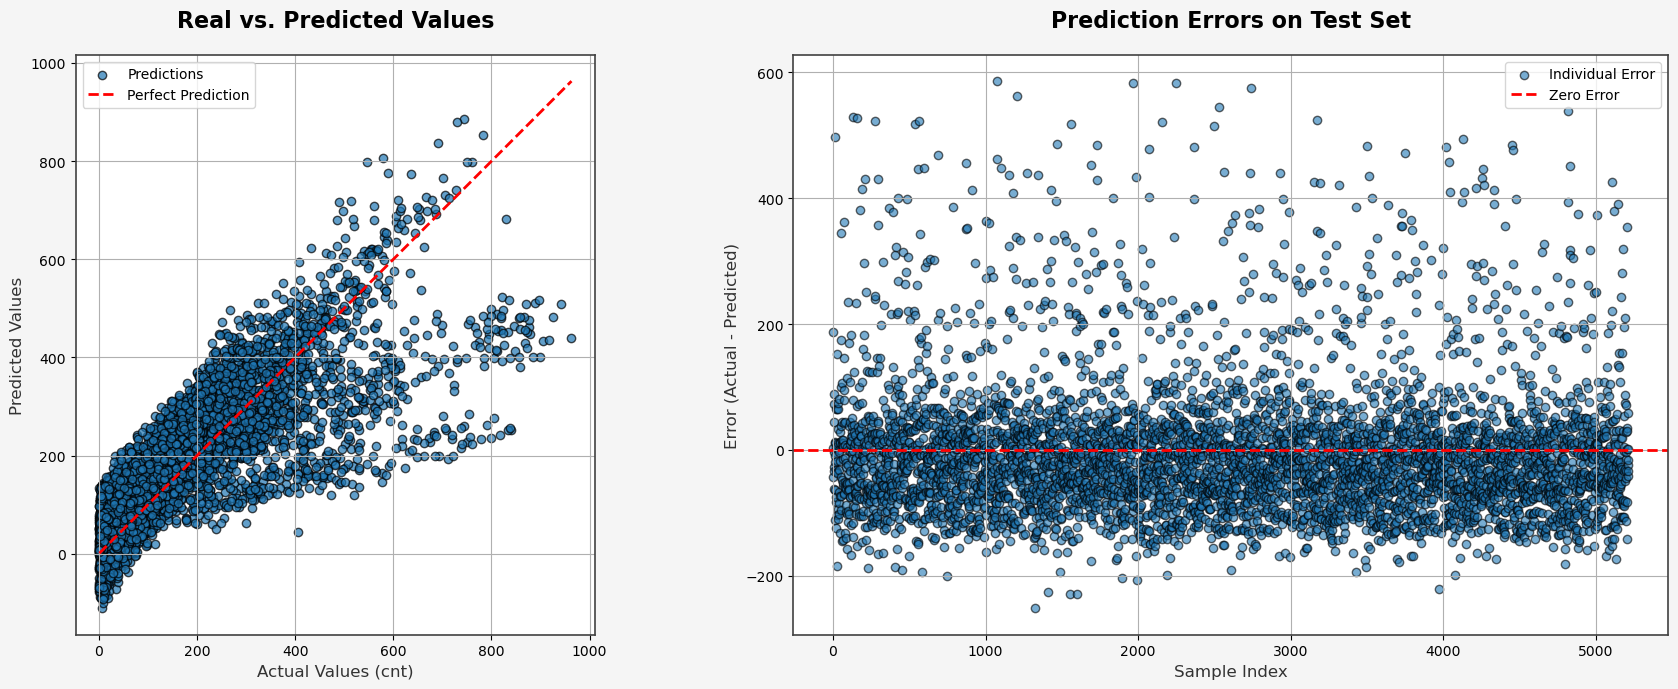

In [ ]:
y_test_pred = X_test_beta @ beta_hat


fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].scatter(y_test, y_test_pred, alpha=0.7, edgecolor='k', label='Predictions')
linea_perfecta = [y_test.min(), y_test.max()]
ax[0].plot(linea_perfecta, linea_perfecta, 'r--', lw=2, label='Perfect Prediction')

ax[0].set_title('Real vs. Predicted Values', fontsize=16)
ax[0].set_xlabel('Actual Values (cnt)', fontsize=12)
ax[0].set_ylabel('Predicted Values', fontsize=12)
ax[0].legend()
ax[0].grid(True)
ax[0].set_aspect('equal', adjustable='box')

errores = y_test - y_test_pred

ax[1].scatter(range(len(errores)), errores, alpha=0.6, edgecolor='k', label='Individual Error')
ax[1].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Error')

ax[1].set_title('Prediction Errors on Test Set', fontsize=16)
ax[1].set_xlabel('Sample Index', fontsize=12)
ax[1].set_ylabel('Error (Actual - Predicted)', fontsize=12)
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Gradient Descent

### Implement gradient descent to minimize mean squared error.

In [166]:
def f(X, beta):
    return X @ beta

def mse_gradient(beta, X, y):
    return np.mean((f(X, beta) - y) * X.T, axis=1)

def mean_squared_error(beta, X, y):
    return np.mean((y - f(X, beta))**2)

### Experiment with at least two learning rates; show cost vs. iteration curves

In [167]:
threshold = 1e-3
step_sizes = [0.01, 0.001]
results = {}

for step_size in step_sizes:
    beta, beta_prev = np.ones(X_train_beta.shape[1]) * 0.1, np.zeros(X_train_beta.shape[1])
    opt_pts = [beta.copy()]
    opt_grads = []
    iter_count = 0

    ls_cost = []
    ls_iter = []

    while np.linalg.norm(beta - beta_prev) > threshold:
        ls_iter.append(iter_count)
        cost = mean_squared_error(beta, X_train_beta, y_train_np)
        ls_cost.append(cost)

        if iter_count % 10 == 0:
            print(f"Step size {step_size} — Iteration {iter_count}, MSE: {cost:.6f}")

        beta_prev = beta.copy()
        gradient = mse_gradient(beta, X_train_beta, y_train_np)
        beta = beta_prev - step_size * gradient

        opt_pts.append(beta.copy())
        opt_grads.append(gradient)
        iter_count += 1

    results[step_size] = {
        "beta": beta,
        "costs": ls_cost,
        "iterations": ls_iter
    }


Step size 0.01 — Iteration 0, MSE: 69375.103546
Step size 0.01 — Iteration 10, MSE: 29793.964140
Step size 0.01 — Iteration 20, MSE: 25258.729959
Step size 0.01 — Iteration 30, MSE: 22334.565146
Step size 0.01 — Iteration 40, MSE: 20306.568490
Step size 0.01 — Iteration 50, MSE: 18873.623458
Step size 0.01 — Iteration 60, MSE: 17840.461481
Step size 0.01 — Iteration 70, MSE: 17078.879740
Step size 0.01 — Iteration 80, MSE: 16504.143770
Step size 0.01 — Iteration 90, MSE: 16059.832149
Step size 0.01 — Iteration 100, MSE: 15708.058244
Step size 0.01 — Iteration 110, MSE: 15423.135546
Step size 0.01 — Iteration 120, MSE: 15187.456607
Step size 0.01 — Iteration 130, MSE: 14988.800227
Step size 0.01 — Iteration 140, MSE: 14818.563626
Step size 0.01 — Iteration 150, MSE: 14670.595961
Step size 0.01 — Iteration 160, MSE: 14540.424338
Step size 0.01 — Iteration 170, MSE: 14424.737053
Step size 0.01 — Iteration 180, MSE: 14321.036151
Step size 0.01 — Iteration 190, MSE: 14227.401974
Step size 0

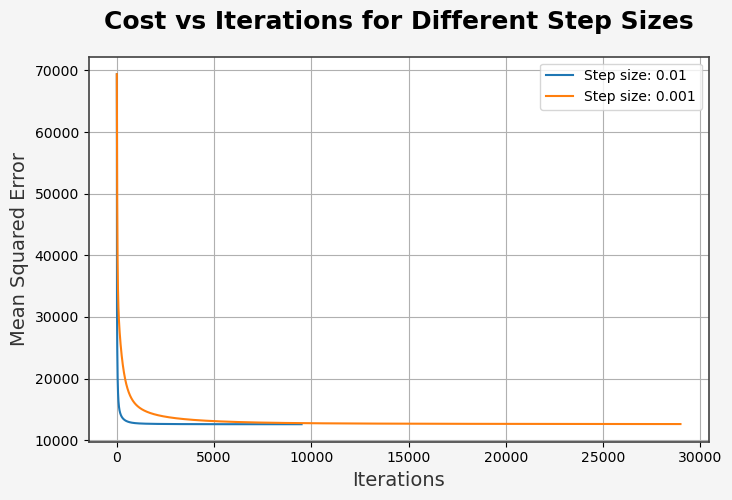

In [168]:
plt.figure(figsize=(8,5))

for step_size in step_sizes:
    plt.plot(
        results[step_size]["iterations"],
        results[step_size]["costs"],
        label=f"Step size: {step_size}"
    )

plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Cost vs Iterations for Different Step Sizes")
plt.legend()
plt.grid(True)
plt.show()

### Compare parameters and test error to the closed-form OLS.

In [ ]:
comparison = {"OLS": list(beta_hat) + [mean_squared_error(beta_hat, X_test_beta, y_test_np)]}

for step_size in step_sizes:
    comparison[f"GD step_size={step_size}"] = list(results[step_size]["beta"]) + [mean_squared_error(results[step_size]["beta"], X_test_beta, y_test_np)]

index = [f"Beta_{i}" for i in range(1, len(beta_hat)+1)] + ["MSE"]


df_comparison = pd.DataFrame(comparison, index=index)

print("Comparison of Betas and MSE:\n")
display(df_comparison)

Comparison of Betas and MSE:



,OLS,GD step_size=0.01,GD step_size=0.001
Beta_1,89.812326,86.965654,64.862854
Beta_2,17.707555,18.291738,23.307828
Beta_3,65.441764,65.612544,66.877883
Beta_4,-5.375462,-4.640254,3.482552
Beta_5,-15.552170,-15.640321,-13.432901
Beta_6,-55.310358,-55.209028,-53.811379
Beta_7,-53.018989,-52.903856,-51.663314
Beta_8,2.808794,3.762335,1.872392
Beta_9,-0.017496,0.052576,0.560664
Beta_10,74.454406,74.871411,76.226997


Based on these results, the OLS model seems slightly better because it has the lowest MSE (11739.093162), compared to the Gradient Descent models.

The differences in beta values are small, but OLS achieves the best performance in terms of test error.

# Part B. Scikit-learn Linear Models

## Use LinearRegression and confirm the coefficients match your OLS implementation

In [206]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print("LinearRegression coefficients:\n", np.round(linear_model.coef_, 4))
print("Intercept:", round(linear_model.intercept_, 4))
print("\nClosed-form OLS coefficients:\n", np.round(beta_hat[1:], 4))
print("Intercept:", round(beta_hat[0], 4))

LinearRegression coefficients:
 [ 1.77076e+01  6.54418e+01 -5.37550e+00 -1.55522e+01 -5.53104e+01
 -5.30190e+01  2.80880e+00 -1.75000e-02  7.44544e+01 -1.96780e+01
 -2.20750e+00  2.89690e+00  1.05100e+00  9.64715e+01]
Intercept: 89.8123

Closed-form OLS coefficients:
 [ 1.77076e+01  6.54418e+01 -5.37550e+00 -1.55522e+01 -5.53104e+01
 -5.30190e+01  2.80880e+00 -1.75000e-02  7.44544e+01 -1.96780e+01
 -2.20750e+00  2.89690e+00  1.05100e+00  9.64715e+01]
Intercept: 89.8123


In [210]:
comparison = {"OLS": np.round(list(beta_hat), 4)}
linear_betas = np.round(np.concatenate(([linear_model.intercept_], linear_model.coef_)), 4)
comparison["Linear Regression"] = linear_betas

index = ["Intercept"] + [f"Beta_{i}" for i in range(1, len(beta_hat))]

df_comparison = pd.DataFrame(comparison, index=index)

print("Comparison of Betas:\n")
display(df_comparison)

Comparison of Betas:



,OLS,Linear Regression
Intercept,89.8123,89.8123
Beta_1,17.7076,17.7076
Beta_2,65.4418,65.4418
Beta_3,-5.3755,-5.3755
Beta_4,-15.5522,-15.5522
Beta_5,-55.3104,-55.3104
Beta_6,-53.0190,-53.0190
Beta_7,2.8088,2.8088
Beta_8,-0.0175,-0.0175
Beta_9,74.4544,74.4544


In [178]:
train_mse = ((y_train - linear_model.predict(X_train)) ** 2).mean()
train_r2 = linear_model.score(X_train, y_train)

In [179]:
print('\nTrain MSE: %.4f' % train_mse)
print('Train R2: %.4f' % train_r2)


Train MSE: 12593.9960
Train R2: 0.6232


In [180]:
test_mse = ((y_test - linear_model.predict(X_test)) ** 2).mean()
test_r2 = linear_model.score(X_test, y_test)

print('\nTest MSE: %.4f' % test_mse)
print('Test R2: %.4f' % test_r2)


Test MSE: 11739.0932
Test R2: 0.6294


# Part C. Regularization and Hyperparameter Choice

## Ridge and Lasso

In [181]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.model_selection import ShuffleSplit, KFold
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

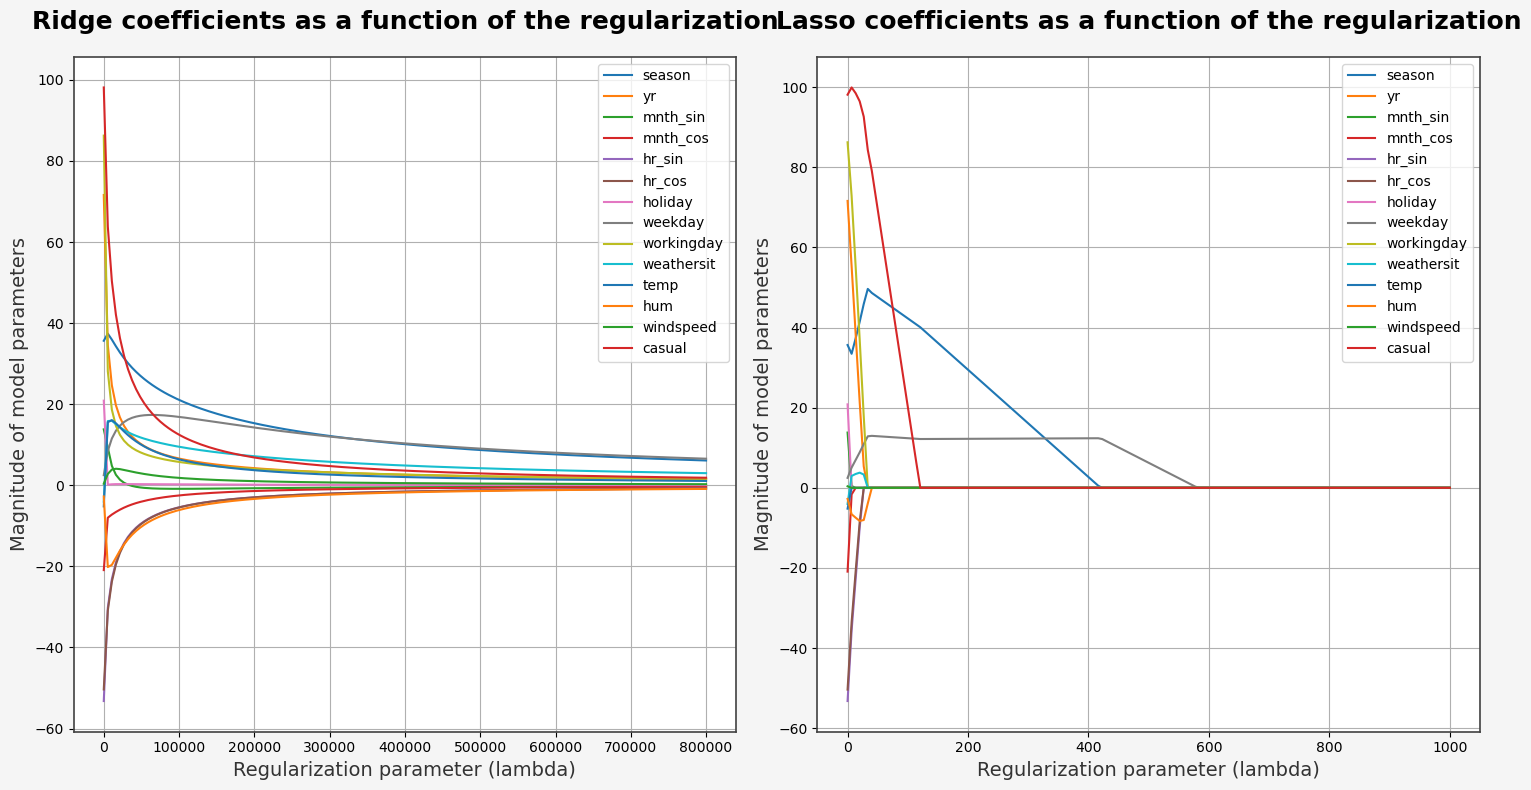

In [203]:
alphas_r = np.linspace(1e-3,8e5,  # Used more than 10e2 in order to see effects
                     150)

ridge_coefs = []
for a in alphas_r:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

alphas_l = np.linspace(1e-3,10e2,
                     150)

lasso_coefs = []
for a in alphas_l:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

fig, axs = plt.subplots(1,2, figsize=(15,8))

# Plot 1: Ridge coefficients
axs[0].plot(alphas_r, ridge_coefs)
axs[0].set_xlabel('Regularization parameter (lambda)')
axs[0].set_ylabel('Magnitude of model parameters')
axs[0].set_title('Ridge coefficients as a function of the regularization')
axs[0].grid(True)
axs[0].legend([c for c in X.columns], loc="upper right")
axs[0].axis('tight')

# Plot 2: Lasso coefficients
axs[1].plot(alphas_l, lasso_coefs)
axs[1].set_xlabel('Regularization parameter (lambda)')
axs[1].set_ylabel('Magnitude of model parameters')
axs[1].set_title('Lasso coefficients as a function of the regularization')
axs[1].grid(True)
axs[1].legend([c for c in X.columns], loc="upper right")
axs[1].axis('tight')

plt.tight_layout()
plt.show()